In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats

In [42]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'../../data/API/jan_2021_to_feb_2022.csv')
df

,match_id,game_mode,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,5792362494,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5794821137,2,1,0,0,0,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5790226407,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5790375758,2,1,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
4,5790649968,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,6437920662,2,1,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0
12382,6453048875,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12383,6409570374,2,1,0,0,1,0,0,0,0,...,0,0,1,0,-1,0,-1,0,0,0
12384,6437061441,2,1,-1,0,0,0,0,0,0,...,0,0,-1,0,0,-1,0,0,0,0


In [43]:
# check missing data
df.isnull().values.any()

False

In [44]:
# delete cluster_id
df.drop(['match_id'], axis=1, inplace=True)
df

,game_mode,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,2,1,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0
12382,2,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12383,2,1,0,0,1,0,0,0,0,0,...,0,0,1,0,-1,0,-1,0,0,0
12384,2,1,-1,0,0,0,0,0,0,0,...,0,0,-1,0,0,-1,0,0,0,0


In [12]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_mode')

In [13]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_type')

In [14]:
# group1 winning team: 1; gropu2 winning team: -1
# group1 = df[df["match_result"] == 1]
# group2 = df[df["match_result"] == -1]

In [99]:
# skip the first and second columns
df_heroes = df.iloc[:, 2:]
df_heroes

,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0
12382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12383,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-1,0,-1,0,0,0
12384,-1,0,0,0,0,0,0,0,0,-1,...,0,0,-1,0,0,-1,0,0,0,0


<AxesSubplot:>

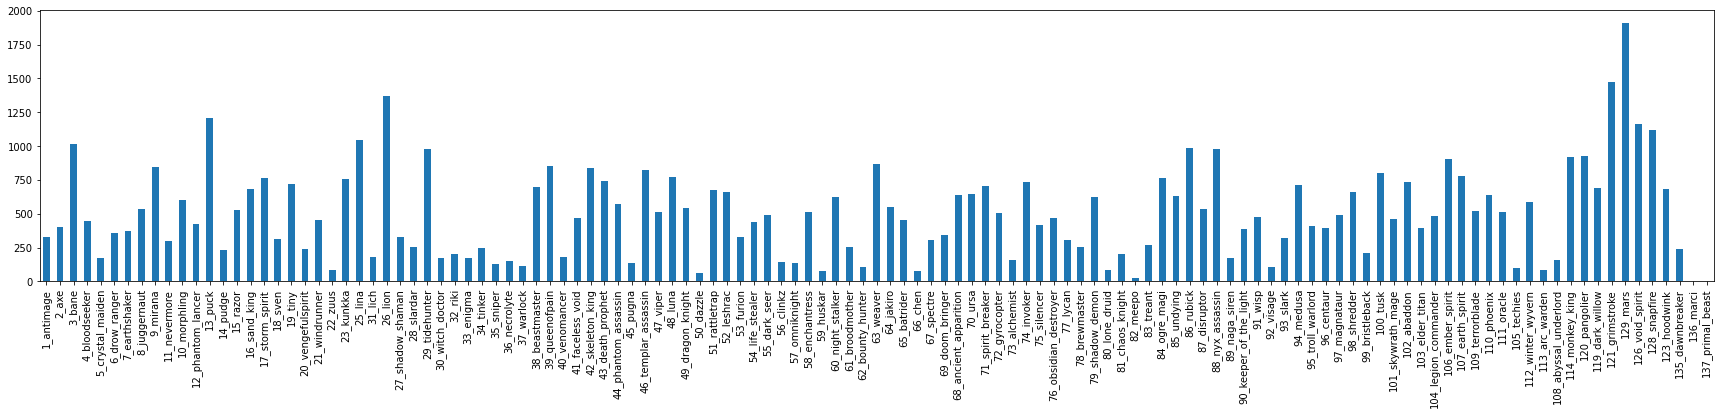

In [100]:
# count winning team heroes 
count_winning = df_heroes[df_heroes == 1].sum(axis=0)
count_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

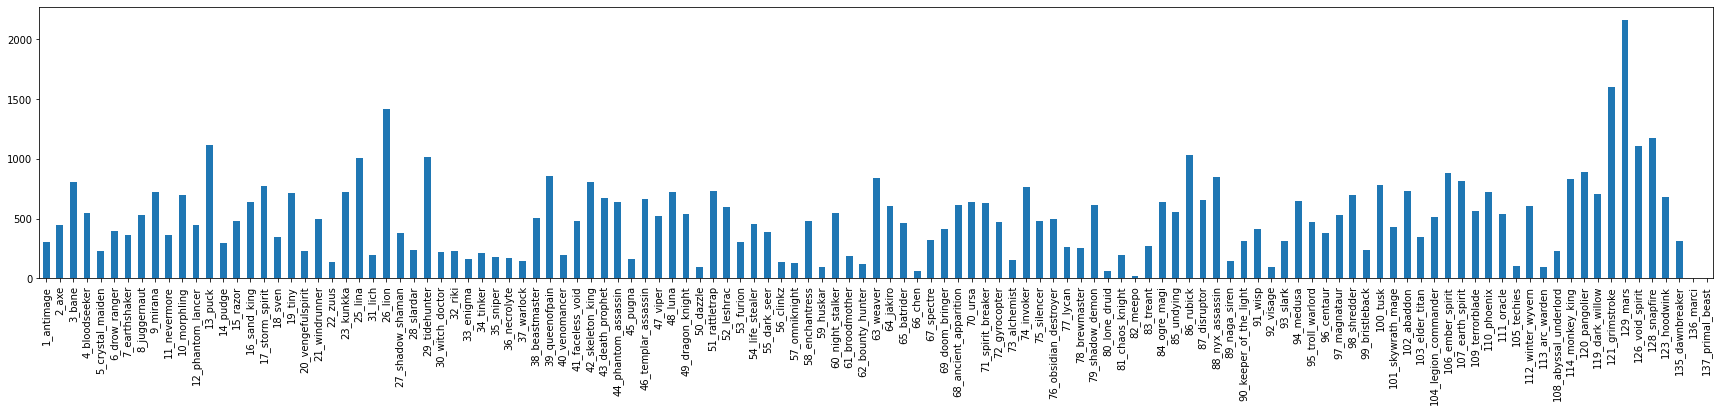

In [101]:
# count losing team heroes 
count_losing = df_heroes[df_heroes == -1].sum(axis=0)
count_losing.abs().plot.bar(figsize=(30,5))

In [97]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_losing.abs().nlargest(n=10))

winning team heroes counts
129_mars           1912.0
121_grimstroke     1471.0
26_lion            1369.0
13_puck            1209.0
126_void_spirit    1166.0
128_snapfire       1116.0
25_lina            1041.0
3_bane             1015.0
86_rubick           988.0
29_tidehunter       979.0
dtype: float64


losing team heroes counts
129_mars           2165.0
121_grimstroke     1605.0
26_lion            1419.0
128_snapfire       1176.0
13_puck            1115.0
126_void_spirit    1111.0
86_rubick          1030.0
29_tidehunter      1017.0
25_lina            1008.0
120_pangolier       892.0
dtype: float64


In [182]:
# Get winning heroes combinations
winning_heroes =[]
for row in range(len(df_heroes)):
  combination = []
  for col in df_heroes:
    if df_heroes.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  winning_heroes.append(tuple(combination))
print(len(winning_heroes))

12386


In [105]:
# Get losing heroes combinations
losing_heroes =[]
for row in range(len(df_heroes)):
  combination = []
  for col in df_heroes:
    if df_heroes.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  losing_heroes.append(tuple(combination))
print(len(losing_heroes))

12386


In [177]:
winning_heroes = tuple(winning_heroes)
losing_heroes = tuple(losing_heroes)

In [184]:
df1 = pd.DataFrame(winning_heroes)
df1.value_counts()

0              1                    2                      3                  4              
2_axe          26_lion              42_skeleton_king       74_invoker         102_abaddon        4
19_tiny        54_life_stealer      68_ancient_apparition  86_rubick          97_magnataur       3
1_antimage     9_mirana             29_tidehunter          52_leshrac         84_ogre_magi       2
10_morphling   15_razor             84_ogre_magi           87_disruptor       120_pangolier      2
3_bane         44_phantom_assassin  86_rubick              106_ember_spirit   129_mars           2
                                                                                                ..
21_windrunner  44_phantom_assassin  52_leshrac             88_nyx_assassin    97_magnataur       1
                                    63_weaver              71_spirit_breaker  121_grimstroke     1
                                    68_ancient_apparition  73_alchemist       126_void_spirit    1
               

In [163]:
df1 = pd.DataFrame(winning_heroes)
df1
df2 = pd.DataFrame(losing_heroes)
df2

,0,1,2,3,4
0,15_razor,17_storm_spirit,25_lina,33_enigma,98_shredder
1,5_crystal_maiden,17_storm_spirit,47_viper,77_lycan,100_tusk
2,16_sand_king,77_lycan,86_rubick,110_phoenix,114_monkey_king
3,13_puck,80_lone_druid,85_undying,107_earth_spirit,126_void_spirit
4,13_puck,26_lion,60_night_stalker,77_lycan,86_rubick
...,...,...,...,...,...
12381,23_kunkka,44_phantom_assassin,71_spirit_breaker,87_disruptor,121_grimstroke
12382,15_razor,31_lich,71_spirit_breaker,86_rubick,109_terrorblade
12383,48_luna,60_night_stalker,63_weaver,126_void_spirit,123_hoodwink
12384,1_antimage,11_nevermore,23_kunkka,121_grimstroke,128_snapfire


In [152]:
df1.value_counts()

0              1                    2                      3                  4              
2_axe          26_lion              42_skeleton_king       74_invoker         102_abaddon        4
19_tiny        54_life_stealer      68_ancient_apparition  86_rubick          97_magnataur       3
1_antimage     9_mirana             29_tidehunter          52_leshrac         84_ogre_magi       2
10_morphling   15_razor             84_ogre_magi           87_disruptor       120_pangolier      2
3_bane         44_phantom_assassin  86_rubick              106_ember_spirit   129_mars           2
                                                                                                ..
21_windrunner  44_phantom_assassin  52_leshrac             88_nyx_assassin    97_magnataur       1
                                    63_weaver              71_spirit_breaker  121_grimstroke     1
                                    68_ancient_apparition  73_alchemist       126_void_spirit    1
               

In [155]:
df2.value_counts()

0              1                      2                 3                      4               
13_puck        25_lina                54_life_stealer   61_broodmother         121_grimstroke      3
               69_doom_bringer        88_nyx_assassin   113_arc_warden         128_snapfire        3
26_lion        48_luna                102_abaddon       106_ember_spirit       129_mars            2
25_lina        42_skeleton_king       58_enchantress    110_phoenix            120_pangolier       2
10_morphling   76_obsidian_destroyer  107_earth_spirit  111_oracle             126_void_spirit     2
                                                                                                  ..
21_windrunner  26_lion                28_slardar        68_ancient_apparition  95_troll_warlord    1
                                      29_tidehunter     109_terrorblade        123_hoodwink        1
                                                        44_phantom_assassin    85_undying       

In [106]:
# Count winning combinations 
counts_winning_combinations = pd.Series(winning_heroes).value_counts()
print(counts_winning_combinations.nlargest(n=10))

[2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon]                             4
[19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur]              3
[25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern]                     2
[1_antimage, 3_bane, 9_mirana, 74_invoker, 129_mars]                                    2
[42_skeleton_king, 46_templar_assassin, 79_shadow_demon, 84_ogre_magi, 129_mars]        2
[17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix]               2
[6_drow_ranger, 20_vengefulspirit, 29_tidehunter, 46_templar_assassin, 128_snapfire]    2
[25_lina, 52_leshrac, 54_life_stealer, 58_enchantress, 61_broodmother]                  2
[10_morphling, 15_razor, 84_ogre_magi, 87_disruptor, 120_pangolier]                     2
[63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars]               2
dtype: int64


In [137]:
counts_winning_combinations.size

12291

In [107]:
# Count losing combinations 
counts_losing_combinations = pd.Series(losing_heroes).value_counts()
print(counts_losing_combinations.nlargest(n=10))

[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]        3
[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]              3
[65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix]                       2
[7_earthshaker, 31_lich, 43_death_prophet, 47_viper, 73_alchemist]               2
[2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan]               2
[29_tidehunter, 63_weaver, 103_elder_titan, 109_terrorblade, 126_void_spirit]    2
[12_phantom_lancer, 13_puck, 78_brewmaster, 88_nyx_assassin, 110_phoenix]        2
[27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars]       2
[2_axe, 19_tiny, 39_queenofpain, 87_disruptor, 128_snapfire]                     2
[26_lion, 106_ember_spirit, 109_terrorblade, 110_phoenix, 129_mars]              2
dtype: int64


In [131]:
# Demonstrate counts and percentage of winning team combinations
df_winning_combinations = counts_winning_combinations.to_frame()
df_winning_combinations  = df_winning_combinations .rename(columns={0:'Count'})

df_winning_combinations ['Percentage'] = (df_winning_combinations ['Count'] / df_winning_combinations ['Count'].sum()) * 100 
df_winning_combinations 


,Count,Percentage
"[2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon]",4,0.032295
"[19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur]",3,0.024221
"[25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern]",2,0.016147
"[1_antimage, 3_bane, 9_mirana, 74_invoker, 129_mars]",2,0.016147
"[42_skeleton_king, 46_templar_assassin, 79_shadow_demon, 84_ogre_magi, 129_mars]",2,0.016147
...,...,...
"[13_puck, 16_sand_king, 42_skeleton_king, 68_ancient_apparition, 79_shadow_demon]",1,0.008074
"[9_mirana, 42_skeleton_king, 49_dragon_knight, 121_grimstroke, 129_mars]",1,0.008074
"[2_axe, 16_sand_king, 94_medusa, 112_winter_wyvern, 121_grimstroke]",1,0.008074
"[23_kunkka, 48_luna, 49_dragon_knight, 111_oracle, 119_dark_willow]",1,0.008074


In [130]:
# Demonstrate counts and percentage of losing team combinations
df_losing_combinations = counts_losing_combinations.to_frame()
df_losing_combinations  = df_losing_combinations .rename(columns={0:'Count'})

df_losing_combinations ['Percentage'] = (df_losing_combinations ['Count'] / df_losing_combinations ['Count'].sum()) * 100 
df_losing_combinations 


,Count,Percentage
"[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]",3,0.024221
"[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]",3,0.024221
"[65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix]",2,0.016147
"[7_earthshaker, 31_lich, 43_death_prophet, 47_viper, 73_alchemist]",2,0.016147
"[2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan]",2,0.016147
...,...,...
"[13_puck, 26_lion, 42_skeleton_king, 49_dragon_knight, 121_grimstroke]",1,0.008074
"[26_lion, 67_spectre, 69_doom_bringer, 106_ember_spirit, 112_winter_wyvern]",1,0.008074
"[15_razor, 61_broodmother, 111_oracle, 129_mars, 123_hoodwink]",1,0.008074
"[10_morphling, 26_lion, 29_tidehunter, 49_dragon_knight, 110_phoenix]",1,0.008074
